# Regresión Lineal

In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#cargamos los datos de entrada
data = pd.read_csv("datos_produccion_clima_35.csv")
#veamos cuantas dimensiones y registros contiene
data.shape

(36, 16)

In [3]:
#son 36 registros con 16 columnas. Veamos los primeros registros
data.head()

,fecha,esquila,ovejas,corderos,kilos_lana,rinde_seco,finura,kilo_lana_p/animal,porcentaje_paricion,temp_media,temp_min,tem_max,humedad,cant_lluvia,rad_solar,vel_viento
0,31/12/1985,3514,1419,912,15600,0.0,0.0,4.44,64.27,14.3,6.4,20.9,0.0,208.6,0.0,6.1
1,31/12/1986,3783,1520,680,18167,0.0,0.0,4.80,44.74,12.9,5.8,20.5,58.1,130.3,0.0,6.8
2,31/12/1987,3988,1928,512,11200,0.0,0.0,2.81,26.56,13.8,6.8,20.7,60.3,199.5,0.0,6.4
3,31/12/1988,3590,1560,310,13197,0.0,0.0,3.68,19.87,12.9,5.5,20.4,54.9,85.5,0.0,6.3
4,31/12/1989,2830,1210,150,12300,0.0,0.0,4.35,12.40,14.5,7.1,21.9,56.5,92.5,0.0,6.3


In [4]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,esquila,ovejas,corderos,kilos_lana,rinde_seco,finura,kilo_lana_p/animal,porcentaje_paricion,temp_media,temp_min,tem_max,humedad,cant_lluvia,rad_solar,vel_viento
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2910.166667,1497.805556,522.527778,11813.388889,30.692222,10.400833,4.143889,34.732778,13.452778,5.805556,21.150000,51.222222,181.741667,2184.044444,7.372222
std,709.540395,561.386387,359.433641,2933.659258,29.533112,9.990382,0.867885,20.408218,0.680960,0.948365,1.009809,12.709729,71.551250,2223.645303,2.493146
min,1651.000000,768.000000,34.000000,5245.000000,0.000000,0.000000,2.810000,3.680000,11.900000,2.600000,19.300000,0.000000,59.800000,0.000000,4.100000
25%,2352.250000,1116.750000,275.000000,9921.250000,0.000000,0.000000,3.597500,18.007500,12.975000,5.500000,20.600000,50.575000,130.600000,0.000000,6.050000
50%,2896.500000,1309.000000,503.500000,11410.500000,53.500000,18.500000,3.970000,37.365000,13.500000,6.000000,20.950000,55.000000,181.900000,2046.800000,6.600000
75%,3503.500000,1852.500000,714.000000,13566.500000,57.925000,19.600000,4.540000,48.230000,13.825000,6.400000,21.625000,56.750000,213.875000,4253.225000,7.975000
max,4239.000000,3083.000000,1455.000000,18167.000000,65.270000,21.000000,6.310000,71.600000,14.800000,7.100000,24.300000,62.200000,355.000000,5019.000000,15.500000


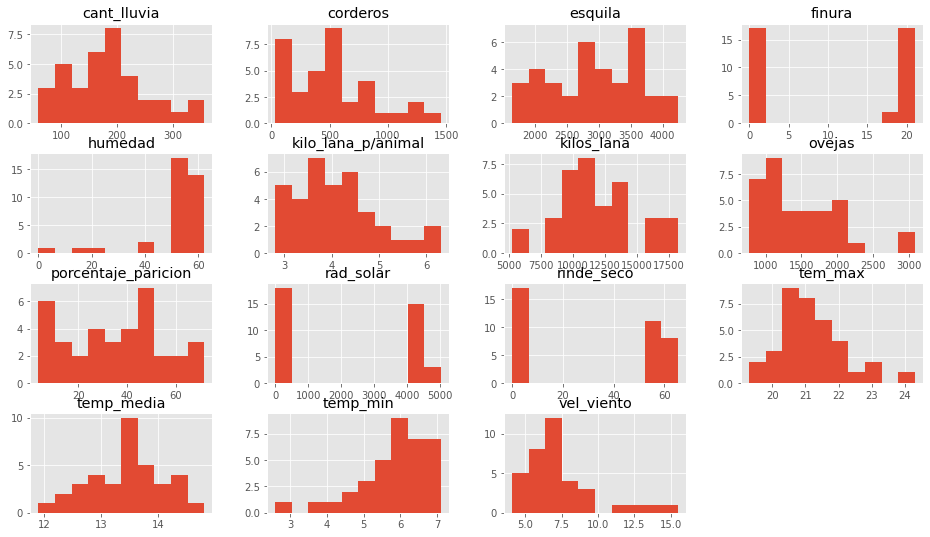

In [6]:
# Visualizamos rápidamente las caraterísticas de entrada
data.hist()
plt.show()

# Regresión Lineal Simple

Predecir a partir de la lluvia la cantidad de lana producida. Según la matriz estas variables no estan correlacionadas :( 

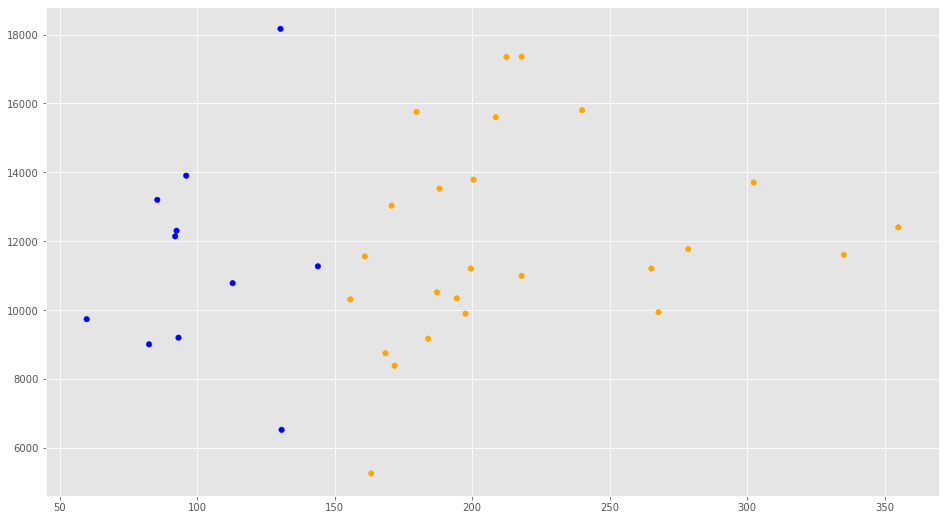

In [13]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['cant_lluvia'].values
f2 = data['kilos_lana'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in data.iterrows():
    if(row['cant_lluvia']>150):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [14]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["cant_lluvia"]]
X_train = np.array(dataX)
y_train = data['kilos_lana'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [7.61563563]
Independent term: 
 10429.310576896733
Mean squared error: 8078614.10
Variance score: 0.03


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 7.61 y el término independiente “b” es 10429,31. Tenemos un Error Cuadrático medio enorme… por lo que en realidad este modelo no será muy bueno. Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

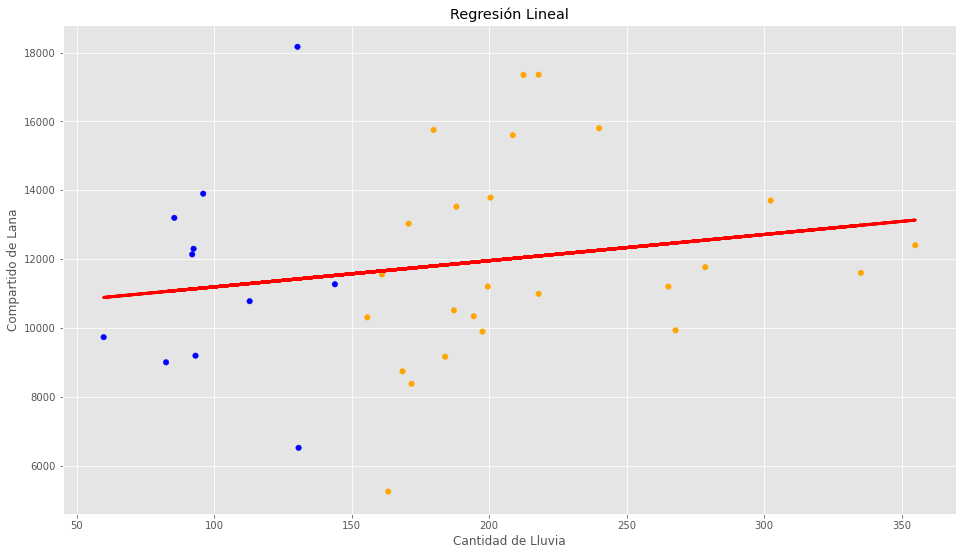

In [16]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Lluvia')
plt.ylabel('Compartido de Lana')
plt.title('Regresión Lineal')

plt.show()

In [18]:
# Vamos a comprobar:
# Quiero predecir cuántos "Kilos de lana" voy a obtener por un acumulado de lluvia de 200,
# según nuestro modelo, hacemos:
y_Doscientos = regr.predict([[200]])
print(int(y_Doscientos))

11952


Predecir a partir de la radiacion solar la finura de la lana producida. Según la matriz estas variables estan correlacionadas

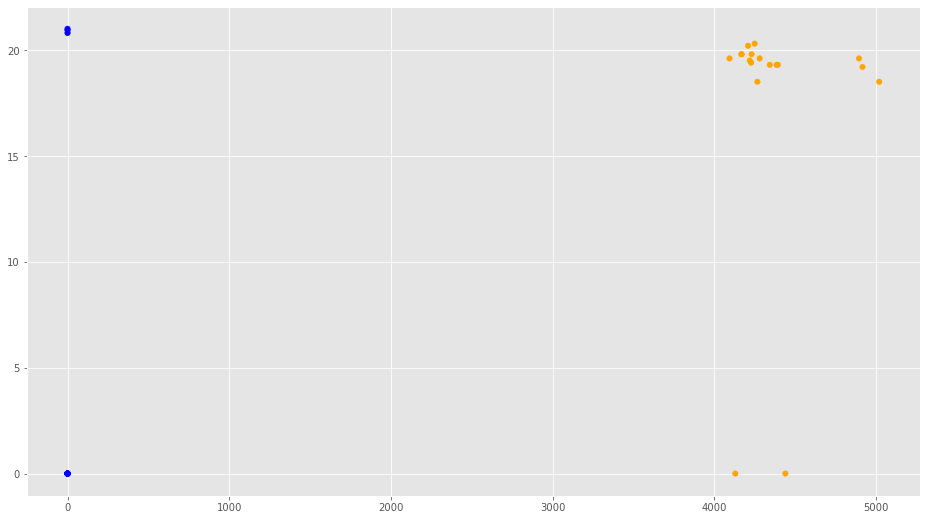

In [19]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['rad_solar'].values
f2 = data['finura'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in data.iterrows():
    if(row['rad_solar']>2000):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [20]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["rad_solar"]]
X_train = np.array(dataX)
y_train = data['finura'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.00315481]
Independent term: 
 3.5105882303767766
Mean squared error: 49.19
Variance score: 0.49


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 0.003 y el término independiente “b” es 3.51. Tenemos un Error Cuadrático grande… por lo que en realidad este modelo no será muy bueno. Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

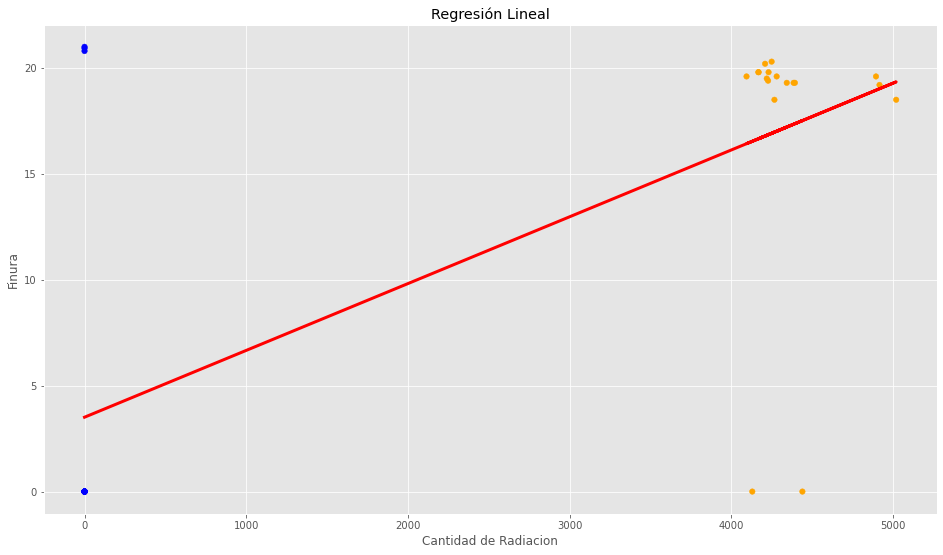

In [22]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Radiacion')
plt.ylabel('Finura')
plt.title('Regresión Lineal')

plt.show()

# Regresión Lineal Múltiple